In [142]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import *

# Introduction

**Linear regression** is an approach for modeling the relationship between a scalar dependent variable $y$ and one or more explanatory variables (or independent variables) denoted $X$. The case of one explanatory variable is called *simple linear regression*. For more than one explanatory variable, the process is called *multiple linear regression*.$^1$ (This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.$^2$

We assume that the equation

$y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ where $\epsilon_i \approx N(0, \sigma^2)$


***
$^1$ David A. Freedman (2009). Statistical Models: Theory and Practice. Cambridge University Press. p. 26. A simple regression equation has on the right hand side an intercept and an explanatory variable with a slope coefficient. A multiple regression equation has two or more explanatory variables on the right hand side, each with its own slope coefficient

$^2$ Rencher, Alvin C.; Christensen, William F. (2012), "Chapter 10, Multivariate regression – Section 10.1, Introduction", Methods of Multivariate Analysis, Wiley Series in Probability and Statistics, 709 (3rd ed.), John Wiley &amp; Sons, p. 19, ISBN 9781118391679.

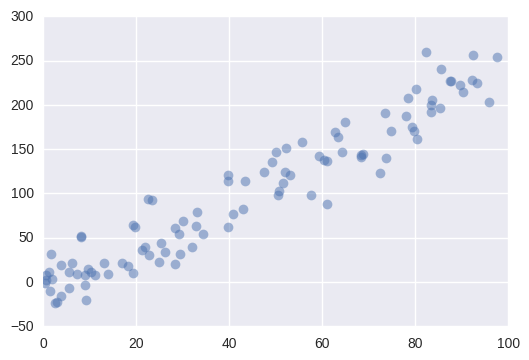

In [143]:
n = 100  # numeber of samples
Xr = np.random.rand(n)*99.0
y = -7.3 + 2.5*Xr + np.random.randn(n)*27.0
plt.plot(Xr, y, "o", alpha=0.5)

Let's add the *bias*, i.e. a column of $1$s to the explanatory variables

In [144]:
X = np.vstack((np.ones(n), Xr)).T
print X.shape
X[0:10,:]

(100, 2)


array([[  1.        ,  23.39898613],
       [  1.        ,   8.89135227],
       [  1.        ,  19.25333926],
       [  1.        ,  60.96497966],
       [  1.        ,  92.27628388],
       [  1.        ,  68.41731103],
       [  1.        ,  55.72185762],
       [  1.        ,  26.11182375],
       [  1.        ,  52.18754121],
       [  1.        ,  79.63390856]])

# Closed-form Linear Regression

And compute the parametes $\beta_0$  and $\beta_1$ according to
$$ \beta = (X^\prime X)^{-1} X^\prime y $$
***
**Note:**
This not only looks elegant but can also be written in Julia code. However, matrix inversion $M^{-1}$ requires $O(d^3)$ iterations for a $d\times d$ matrix.<br /> 
https://www.coursera.org/learn/ml-regression/lecture/jOVX8/discussing-the-closed-form-solution

In [145]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [146]:
yhat = X.dot(beta)
yhat.shape

(100,)

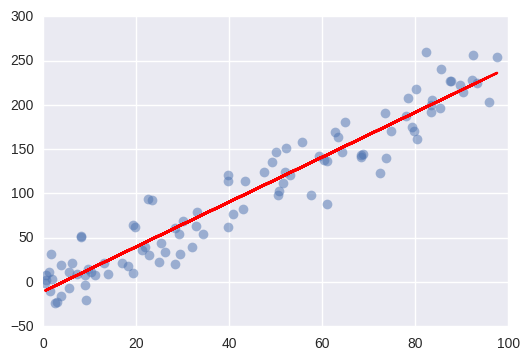

In [147]:
plt.plot(X[:,1], y, "o", alpha=0.5)
plt.plot(X[:,1], yhat, "-", alpha=1, color="red")

# Multiple Linear Regression

''

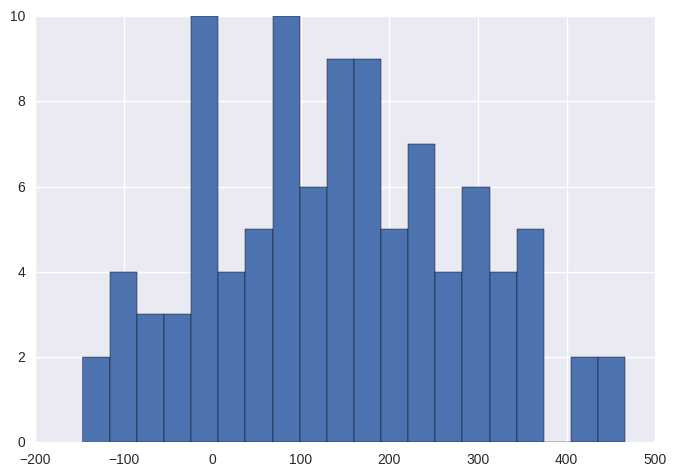

In [66]:
n = 100  # numeber of samples
X1 = np.random.rand(n)*99.0
X2 = np.random.rand(n)*51.0 - 26.8
X3 = np.random.rand(n)*5.0 + 6.1
X4 = np.random.rand(n)*1.0 - 0.5
X5 = np.random.rand(n)*300.0

y_m = -7.3 + 2.5*X1 + -7.9*X2 + 1.5*X3 + 10.0*X4 + 0.13*X5 + np.random.randn(n)*7.0
plt.hist(y_m, bins=20)
;

In [67]:
X_m = np.vstack((np.ones(n), X1, X2, X3, X4, X5)).T
X_m.shape

(100, 6)

In [68]:
### β = inv(X'*X)*X'*y
beta_m = np.linalg.inv(X_m.T.dot(X_m)).dot(X_m.T).dot(y_m)
beta_m

array([ -3.89296672,   2.53740144,  -7.97042339,   1.03433261,
        10.95288369,   0.1256619 ])

In [69]:
yhat_m = X.dot(beta_m)
yhat_m.shape

(100,)

# Evaluation: Root-mean-square Deviation
The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a good measure of accuracy, but only to compare forecasting errors of different models for a particular variable and not between variables, as it is scale-dependent.$^1$

![](imgs/fc187c3557d633423444d4c80a4a50cd6ecc3dd4.svg)
***
$^1$  Hyndman, Rob J. Koehler, Anne B.; Koehler (2006). "Another look at measures of forecast accuracy". International Journal of Forecasting. 22 (4): 679–688. doi:10.1016/j.ijforecast.2006.03.001.

In [70]:
import math
RSMD = math.sqrt(np.square(yhat_m-y_m).sum()/n)
print RSMD

5.42682050509


# Regularization, Ridge-Regression

Regularization, in mathematics and statistics and particularly in the fields of machine learning and inverse problems, is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting.


In general, a regularization term $R(f)$ is introduced to a general loss function:

![](imgs/872d3606639c7bc8ad91ab4a2976663a77d657c3.svg)
for a loss function  $V$ that describes the cost of predicting $f(x)$ when the label is 
$y$, such as the square loss or hinge loss, and for the term 
$\lambda$  which controls the importance of the regularization term. 
$R(f)$ is typically a penalty on the complexity of 
$f$, such as restrictions for smoothness or bounds on the vector space norm.$^1$

A theoretical justification for regularization is that it attempts to impose Occam's razor on the solution, as depicted in the figure. From a Bayesian point of view, many regularization techniques correspond to imposing certain prior distributions on model parameters.

Regularization can be used to learn simpler models, induce models to be sparse, introduce group structure into the learning problem, and more.

We're going to add the L2 term $\lambda||\beta||_2^2$ to the regression equation, which yields to$^2$

$$ \beta = (X^\prime X + \lambda I)^{-1} X^\prime y $$

***
$^1$ Bishop, Christopher M. (2007). Pattern recognition and machine learning (Corr. printing. ed.). New York: Springer. ISBN 978-0387310732.

$^2$ http://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution

In [148]:
p = X.shape[1]  ## get number of parameters
lam = 10.0
p, lam

(2, 10.0)

In [149]:
### β₂ = inv(X'*X + λ*eye(p))*X'*y
beta2 = np.linalg.inv(X.T.dot(X) + lam*np.eye(p)).dot(X.T).dot(y)

In [150]:
yhat2 = X.dot(beta2)

In [152]:
RSMD2 = math.sqrt(np.square(yhat2-y).sum()/n)
print RSMD2

22.5182454253


      RMSE =  22.4723360521
Ridge RMSE =  22.5182454253


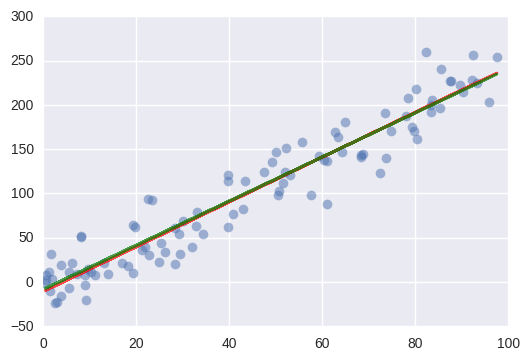

In [154]:
##n = float(X.shape[0])
print "      RMSE = ", math.sqrt(np.square(yhat-y).sum()/n)
print "Ridge RMSE = ", math.sqrt(np.square(yhat2-y).sum()/n)
plt.plot(X[:,1], y, "o", alpha=0.5)
plt.plot(X[:,1], yhat, "-", alpha=0.7, color="red")
plt.plot(X[:,1], yhat2, "-", alpha=0.7, color="green")

In [157]:
n = 100
Xr_test = np.random.rand(n)*99.0
X_test = np.vstack((np.ones(n), Xr_test)).T
y_test = -7.3 + 2.5*Xr_test + np.random.randn(n)*27.0
yhat_test = X_test.dot(beta)
yhat_test2 = X_test.dot(beta2)


Test       RMSE =  22.5329302973
Test Ridge RMSE =  22.5234457321


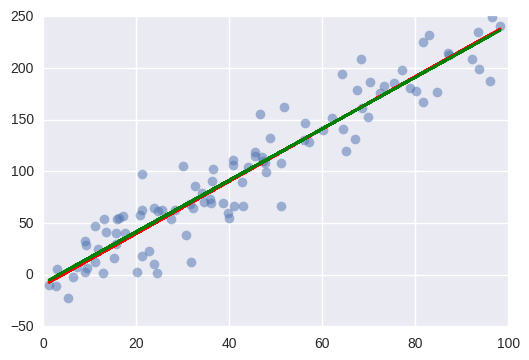

In [158]:
print "Test       RMSE = ", math.sqrt(np.square(yhat_test-y_test).sum()/n)
print "Test Ridge RMSE = ", math.sqrt(np.square(yhat_test2-y_test).sum()/n)
plt.plot(X_test[:,1], y_test, "o", alpha=0.5)
plt.plot(X_test[:,1], yhat_test, "-", alpha=1, color="red")
plt.plot(X_test[:,1], yhat_test2, "-", alpha=1, color="green")

# Run regressions with varying λ and σ
Let's compute the (L2 regularized) linear regression for varying levels of noise, and regulization parameters

In [3]:
rmse(ŷ, y) = √mean((ŷ-y).^2)

rmse (generic function with 1 method)

In [16]:
n = 100  # numeber of samples

X₁ = rand(n)*99.0
X₂ = rand(n)*51.0 - 26.8
X₃ = rand(n)*5.0 + 6.1
X₄ = rand(n)*1.0 - 0.5
X₅ = rand(n)*300.0
X̃ = rand(n)*1.0 - 0.5


X = [ones(n) X₁ X₂ X₃ X₄ X₅]

p = size(X,2)

for σ in [50, 100, 200]
    y = -7.3 + 2.5X₁ + -7.9X₂ + 1.5X₃ + 10.0X₄ + 0.13X₅ + 1.0X̃.^3 + rand(Normal(0.0, σ), n)
   
    for λ in [0.0, 2.0, 10.0, 100.0]
        β = inv(X'*X + λ*eye(p))*X'*y
        ŷ = X*β
        R = rmse(ŷ, y)
        @printf("σ=%8.3lf\tλ=%8.3lf\tRMSD=%8.3lf\n", σ, λ, R)
    end
end

σ=  50.000	λ=   0.000	RMSD=  45.869
σ=  50.000	λ=   2.000	RMSD=  45.877
σ=  50.000	λ=  10.000	RMSD=  45.923
σ=  50.000	λ= 100.000	RMSD=  46.012
σ= 100.000	λ=   0.000	RMSD=  93.671
σ= 100.000	λ=   2.000	RMSD=  93.911
σ= 100.000	λ=  10.000	RMSD=  94.375
σ= 100.000	λ= 100.000	RMSD=  94.672
σ= 200.000	λ=   0.000	RMSD= 219.230
σ= 200.000	λ=   2.000	RMSD= 219.458
σ= 200.000	λ=  10.000	RMSD= 219.898
σ= 200.000	λ= 100.000	RMSD= 220.186


λ=   0.000	RMSD= 154.504
λ=  20.000	RMSD= 154.508
λ= 100.000	RMSD= 154.540


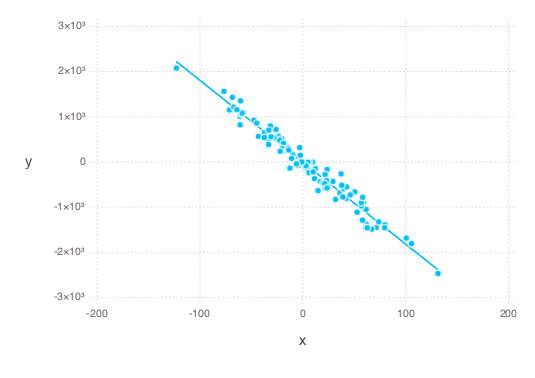

In [52]:
n = 100
σ = 200
λ = 20

X₁ = rand(Normal(0.0, 50), n)  ##linspace(-100, 100.0, n)
X = [ones(n) X₁]

p = size(X,2)

y₁ = -7.3 * 2.5X₁ + rand(Normal(0.0, σ), n)
LL = [layer(x=X₁, y=y₁, Geom.point)]

for λ in [0, 20, 100]
   
    β = inv(X'*X + λ*eye(p))*X'*y₁
    ŷ₁ = X*β
    R = rmse(ŷ₁, y₁)
    @printf("λ=%8.3lf\tRMSD=%8.3lf\n", λ, R)
    push!(LL, layer(x=X₁, y=ŷ₁, Geom.line))
end

plot(LL...)


In most cases we may rely on packages like scikit-learn to model data https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

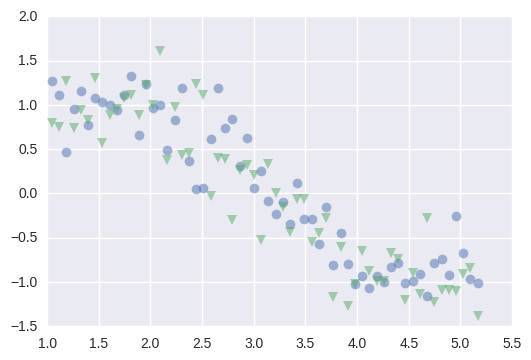

In [176]:
#Define input array with angles from 60deg to 300deg converted to radians
Xr = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(Xr) + np.random.normal(0,0.3,len(Xr))

y_test = np.sin(Xr) + np.random.normal(0,0.3,len(Xr))
plt.plot(Xr, y, 'o', alpha=0.5)
plt.plot(Xr, y_test, 'v', alpha=0.5)

In [184]:
X = np.vstack((np.ones(len(Xr)), Xr)).T

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

yhat = X.dot(beta)
yhat.shape

p = X.shape[1]  ## get number of parameters
lam = 10.0

beta2 = np.linalg.inv(X.T.dot(X) + lam*np.eye(p)).dot(X.T).dot(y)
yhat2 = X.dot(beta2)

      RMSE =  0.335339825015
Ridge RMSE =  0.53447289805


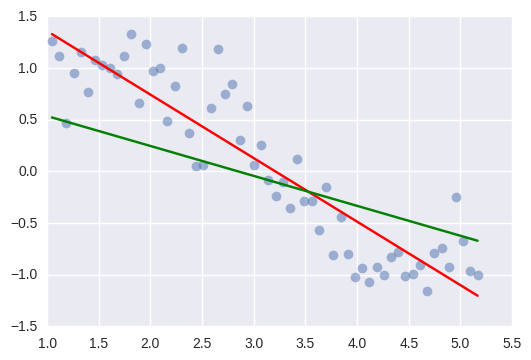

In [185]:
n = float(X.shape[0])
print "      RMSE = ", math.sqrt(np.square(yhat-y).sum()/n)
print "Ridge RMSE = ", math.sqrt(np.square(yhat2-y).sum()/n)
plt.plot(X[:,1], y, "o", alpha=0.5)
plt.plot(X[:,1], yhat, "-", alpha=1, color="red")
plt.plot(X[:,1], yhat2, "-", alpha=1, color="green")

      RMSE =  0.36516295711
Ridge RMSE =  0.558683579046


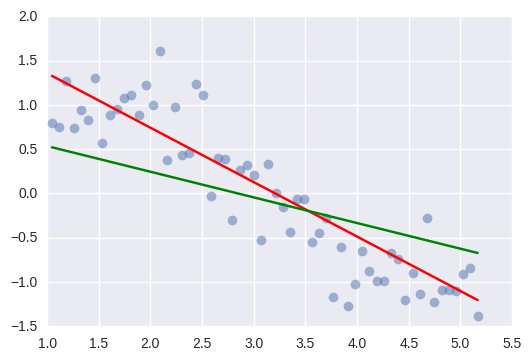

In [186]:
n = float(X.shape[0])
print "      RMSE = ", math.sqrt(np.square(yhat-y_test).sum()/n)
print "Ridge RMSE = ", math.sqrt(np.square(yhat2-y_test).sum()/n)
plt.plot(X[:,1], y_test, "o", alpha=0.5)
plt.plot(X[:,1], yhat, "-", alpha=1, color="red")
plt.plot(X[:,1], yhat2, "-", alpha=1, color="green")